# Import dataset and library

In [55]:
# import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [56]:
#import data
accident_data = pd.read_csv("US_Accidents_MA.csv")

### Which City has the maximum number of accidents?

In [57]:
# Which City has the maximum number of accidents?

city_wise_counts = accident_data.groupby('City')['ID'].count().reset_index()
city_wise_counts = city_wise_counts.sort_values(by = "ID",ascending=False)

max_accident_city = city_wise_counts.iloc[0]  # Get the top city
print(f"The city with the highest number of accidents in Massachusetts is {max_accident_city['City']} with {max_accident_city['ID']} accidents.")


The city with the highest number of accidents in Massachusetts is Boston with 4866 accidents.


/var/folders/x6/yvl9g72j20q30dzkb5yqg1z80000gn/T/ipykernel_26956/670469556.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




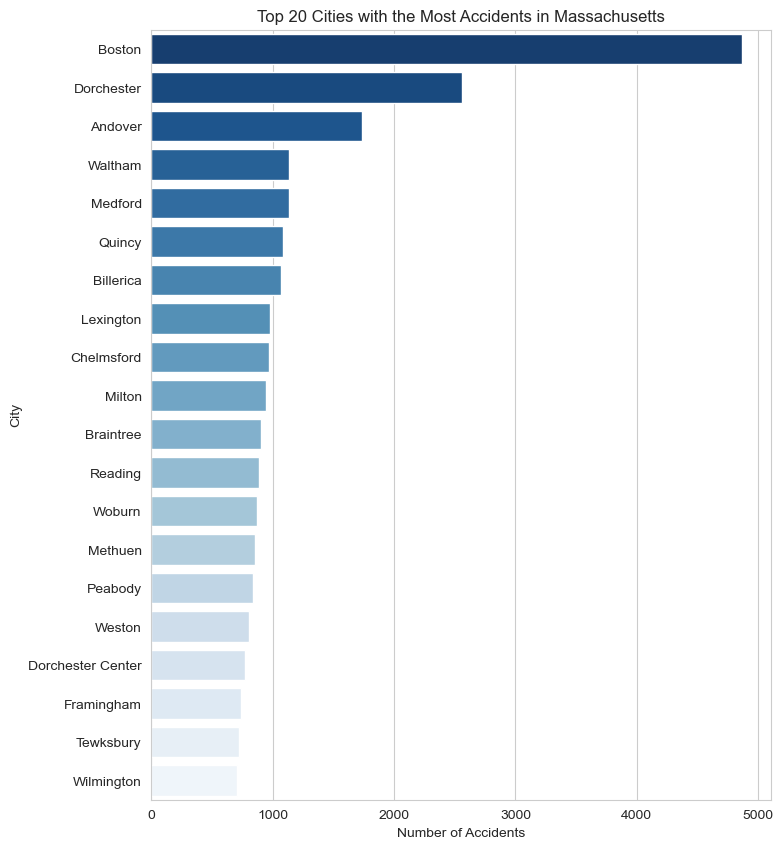

In [58]:
### Using seaborn bar plot

# Get top 20 cities
top_20_cities = city_wise_counts.head(20)

# Set Seaborn style
sns.set_style("whitegrid")

# Create the figure
f, ax = plt.subplots(figsize=(8, 10)) 

# Create the bar plot
sns.barplot(y="City", x="ID", data=top_20_cities, ax=ax, palette="Blues_r")

# Add title and labels
ax.set_title("Top 20 Cities with the Most Accidents in Massachusetts")
ax.set_xlabel("Number of Accidents")
ax.set_ylabel("City")

# Show the plot
plt.show()


In [59]:
# Group accident data by City and State, getting their latitude and longitude
city_wise_counts = accident_data.groupby(["City", "State"])[["Start_Lat", "Start_Lng"]].first().reset_index()
city_wise_counts["Accident_Count"] = accident_data.groupby(["City", "State"])["ID"].count().values

# Create a scatter geo plot for 50 city-wise accidents
top_cities = city_wise_counts.nlargest(50, "Accident_Count")  # Show only top 50 cities
fig = px.scatter_geo(
    top_cities,
    lat="Start_Lat",
    lon="Start_Lng",
    size="Accident_Count",
    hover_name="City",
    hover_data={"State": True, "Accident_Count": True},
    color="Accident_Count",
    color_continuous_scale="spectral_r",
    title="Top 50 Cities with the Most Accidents in the Massachusetts",
    scope="usa"
)
fig.show()


### Accidents based on Time

Text(0.5, 1.0, 'Accidents by Month of the Year')

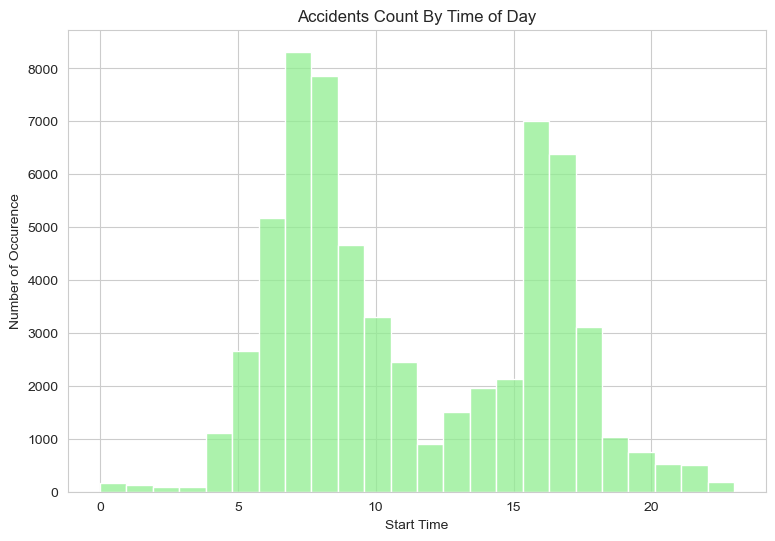

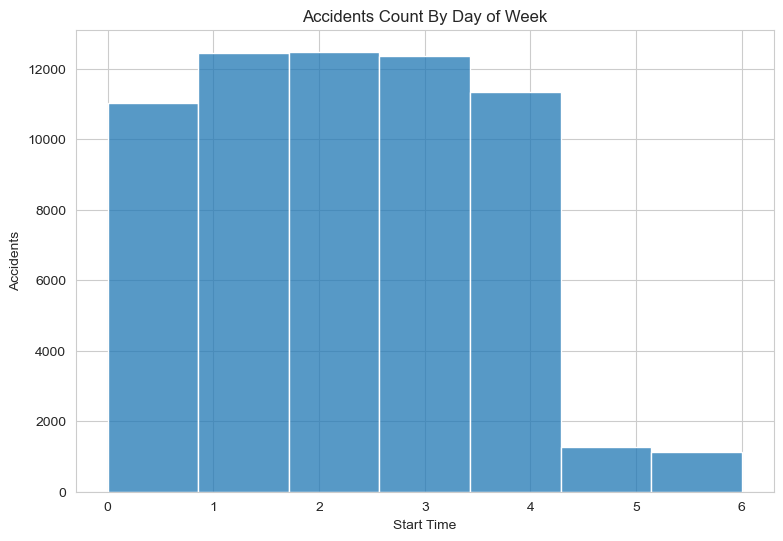

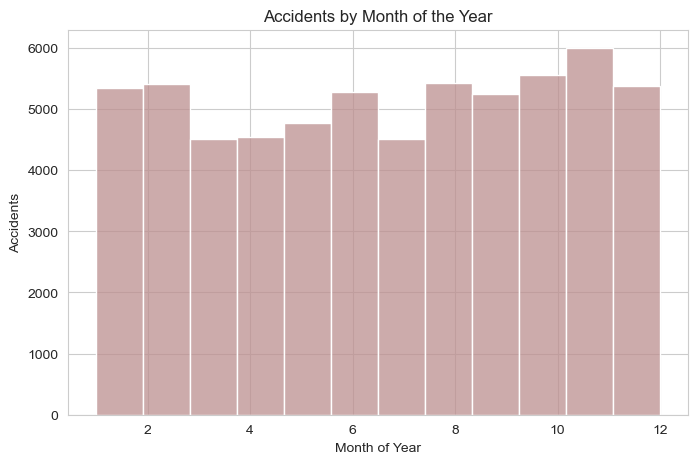

In [60]:
# Accidents based on Time

accident_data["Start_Time"] = pd.to_datetime(accident_data["Start_Time"], format="mixed", errors="coerce")

# To find the accidents by time of day

fig, ax = plt.subplots(figsize=(9,6))
sns.histplot(accident_data.Start_Time.dt.hour,bins=24,kde=False,color='lightgreen')

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

# To find the accidents by Day of the week

fig, ax = plt.subplots(figsize=(9,6))
sns.histplot(accident_data.Start_Time.dt.dayofweek,bins=7,kde=False)

plt.xlabel("Start Time")
plt.ylabel("Accidents")
plt.title('Accidents Count By Day of Week')

# To find the accidents by the month of the year

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(accident_data['Start_Time'].dt.month, bins = 12,color='rosybrown')

plt.xlabel("Month of Year")
plt.ylabel("Accidents")
plt.title('Accidents by Month of the Year')

### Accidents based on weather conditions

/var/folders/x6/yvl9g72j20q30dzkb5yqg1z80000gn/T/ipykernel_26956/2878666995.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Degree of Severity')

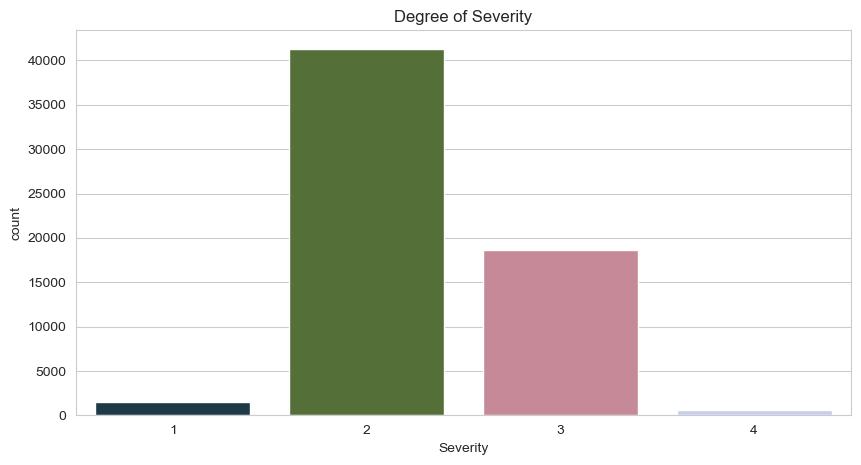

In [61]:
# Accidents based on Severity and Weather Conditions

df_severity = accident_data.groupby('Severity')['ID'].count()

fig, ax = plt.subplots(figsize = (10,5))
sev = sns.countplot(x="Severity", data=accident_data, palette = "cubehelix")
sev.set_title("Degree of Severity")

In [62]:
weather = accident_data.iloc[:, 20:30]
weather['Severity'] = accident_data['Severity']
weather.head()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Severity
0,48.2,NaN,100.0,29.87,3.0,Variable,3.5,NaN,Light Rain,False,2
1,48.0,NaN,89.0,29.96,5.0,ENE,5.8,0.05,Rain,False,2
2,46.9,NaN,86.0,30.01,5.0,ENE,6.9,0.08,Rain,False,3
3,46.0,41.9,89.0,30.01,3.0,East,8.1,0.01,Light Rain,False,4
4,46.0,41.9,100.0,29.97,6.0,NNE,8.1,0.07,Light Rain,False,3


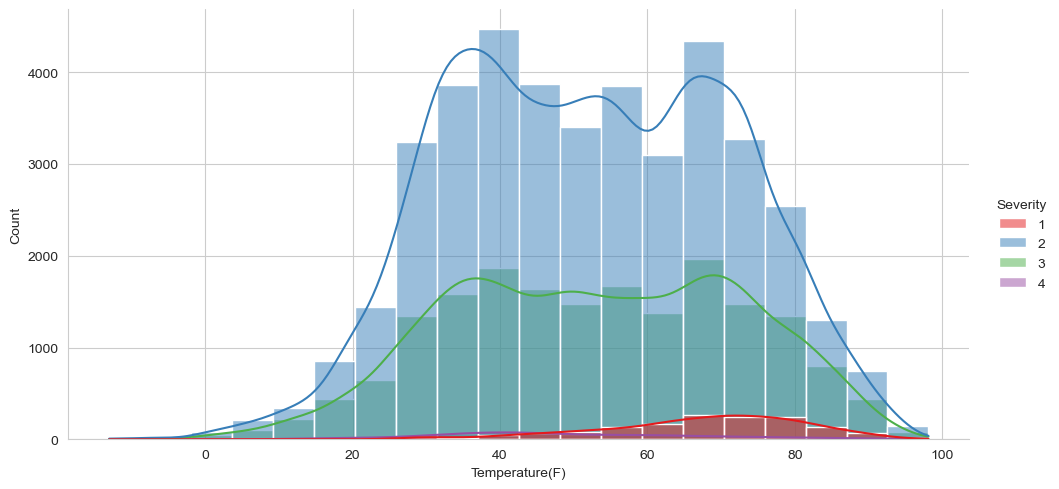

In [63]:
sns.displot(weather, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

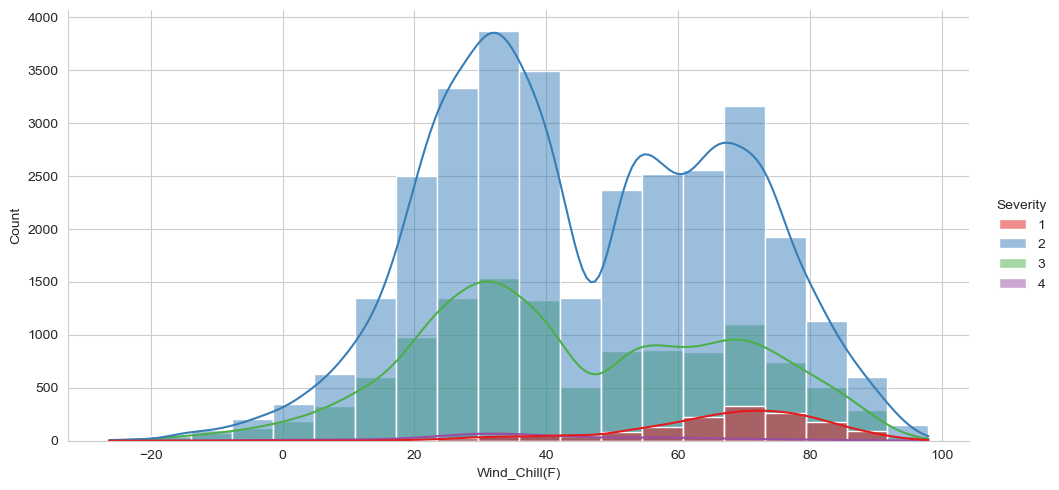

In [64]:
sns.displot(weather, x="Wind_Chill(F)", hue="Severity",palette="Set1", height=5, aspect=2,bins=20,kde=True);

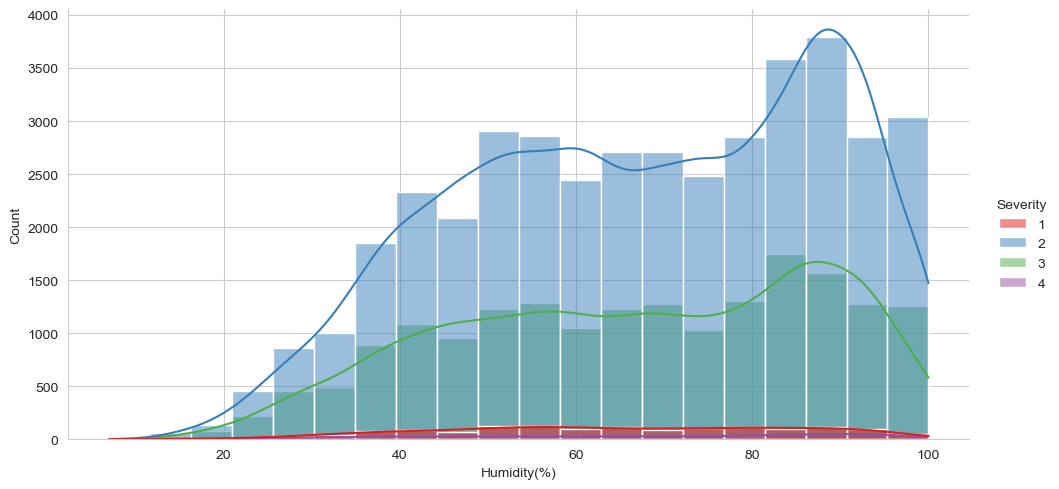

In [65]:
sns.displot(weather, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

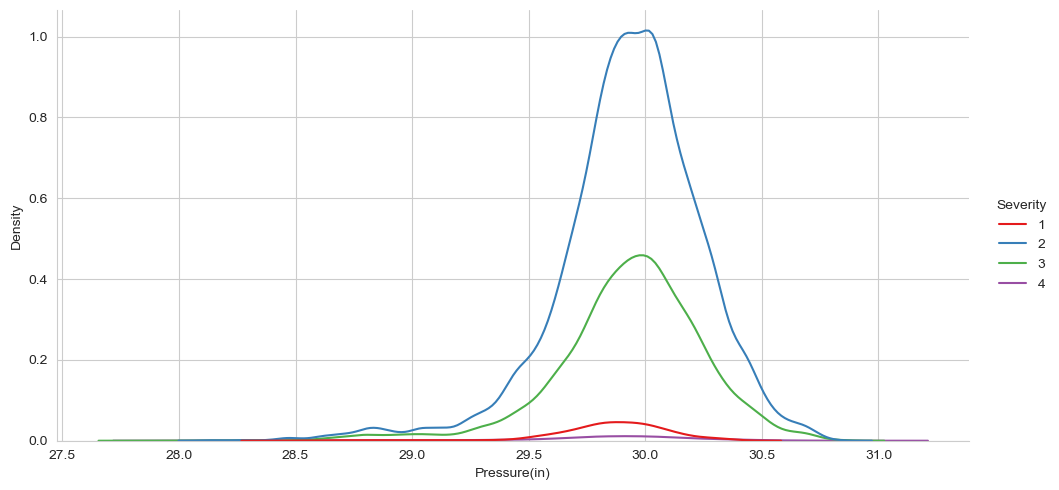

In [66]:
sns.displot(weather, x="Pressure(in)", hue="Severity", palette="Set1", height=5, aspect=2,kind='kde');

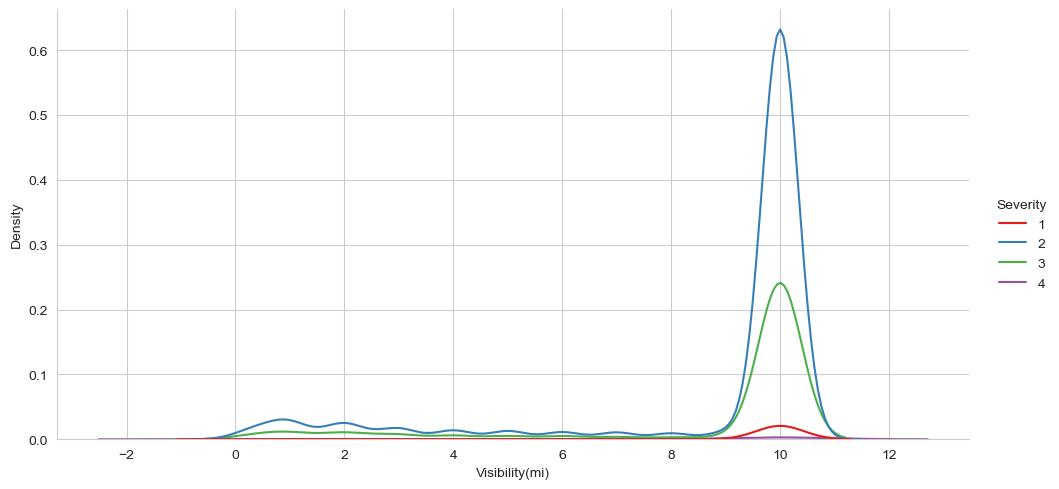

In [67]:
sns.displot(weather, x="Visibility(mi)", hue="Severity", palette="Set1", height=5, aspect=2,kind='kde');

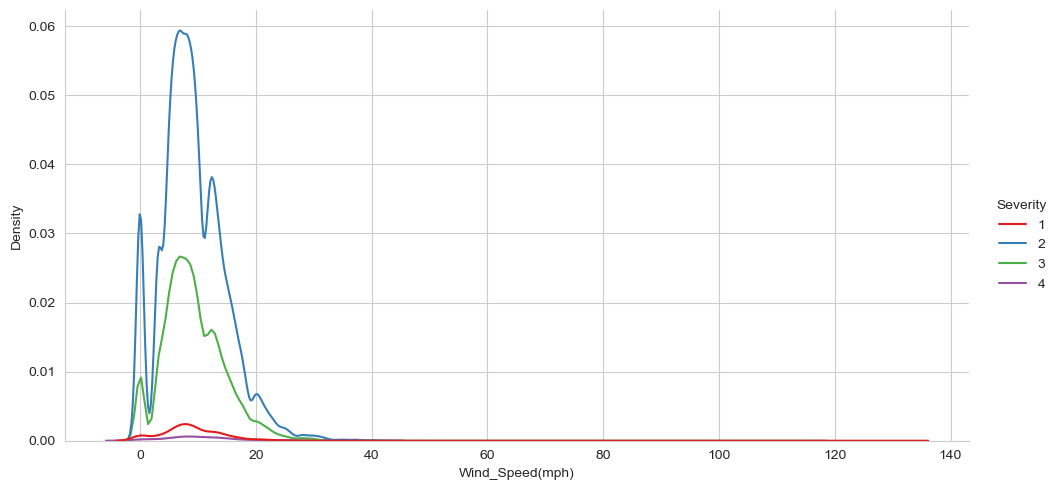

In [68]:
sns.displot(weather, x="Wind_Speed(mph)", hue="Severity", palette="Set1", height=5, aspect=2,kind='kde');

### Accidents based on Infrastructure 

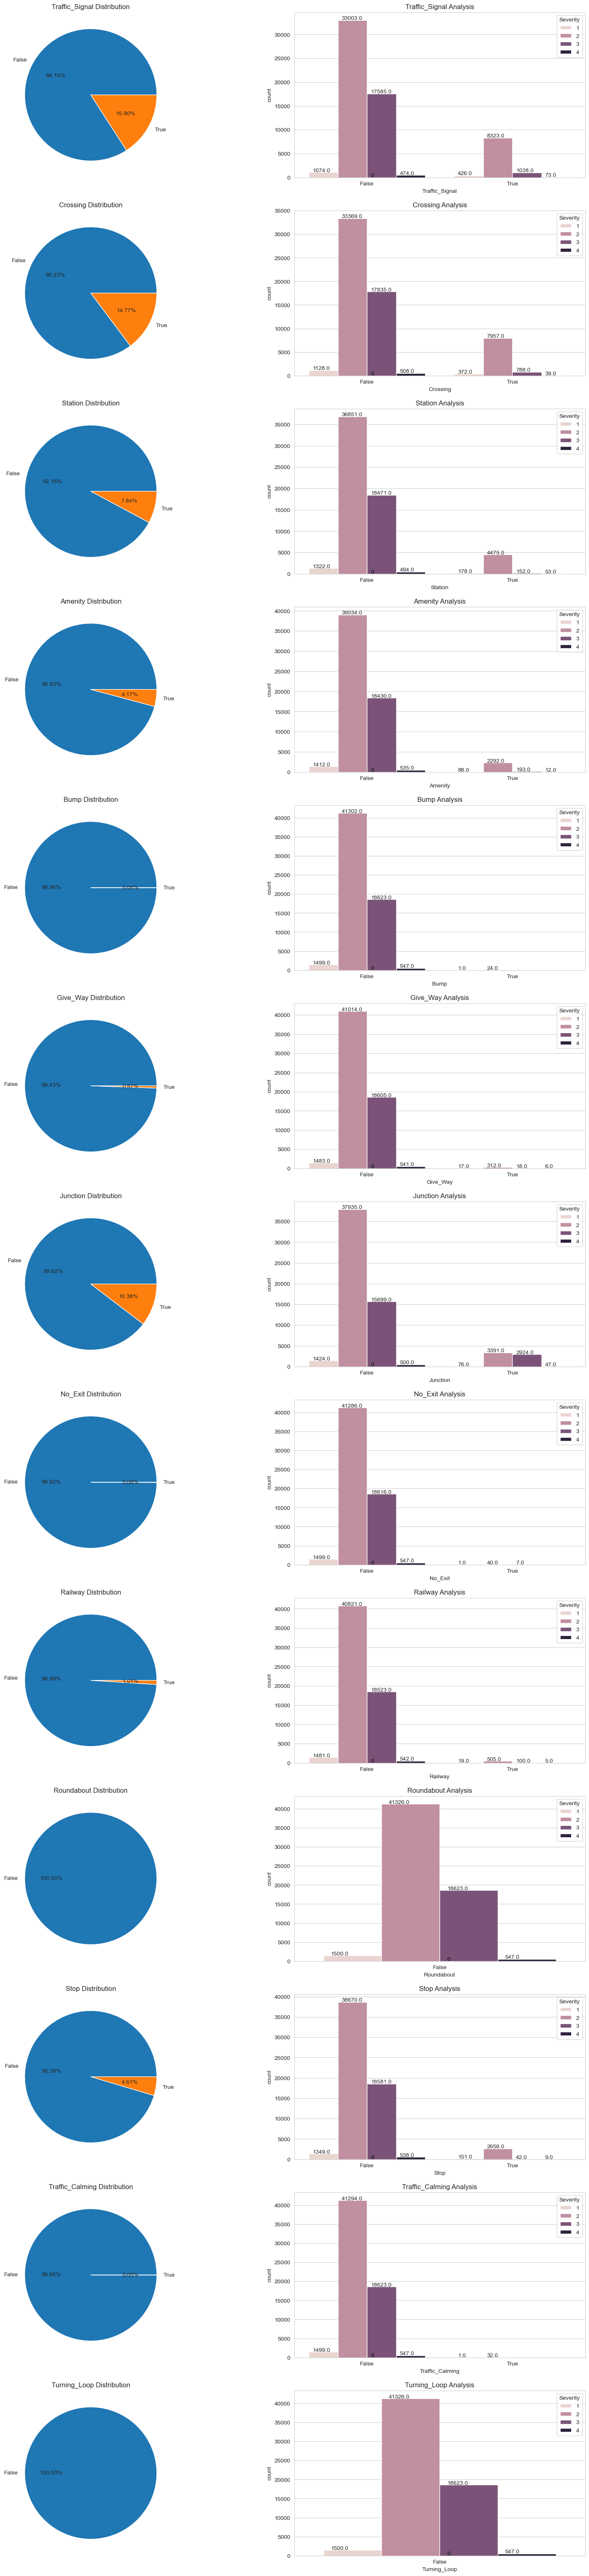

In [69]:
# Show the severity distribution of each category(True/False)
f, axes = plt.subplots(13, 2, figsize=(20, 80))
infrastructure_features = ['Traffic_Signal', 'Crossing', 'Station','Amenity', 'Bump', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout','Stop', 'Traffic_Calming', 'Turning_Loop']
for infrastructure_feature, number in zip(infrastructure_features,range(0,13)):
    accident_data[infrastructure_feature].value_counts().plot.pie(autopct="%.2f%%", ylabel='',ax=axes[number, 0]).set_title(f'{infrastructure_feature} Distribution')
    sns.countplot(x=infrastructure_feature, 
              data=accident_data, 
              order=accident_data[infrastructure_feature].value_counts().index, 
              hue='Severity',
              ax=axes[number, 1]).set_title(f'{infrastructure_feature} Analysis')
    # Add number on corresponding bar                                     
    for p in axes[number, 1].patches:
        axes[number, 1].annotate(p.get_height(), (p.get_x()+0.025, p.get_height()+100))